## Bike Sharing Assaigenment:-

###### Problem Statement:- 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

##### Company's Objectivs:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

**Goal:-**
Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.


### Reading & Understading the data:-

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Splitting into train and test data sets for this first we will import 
#sklearn and then from sklearn will import model_selction
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # For Rescalling purpose
 
import statsmodels.api as sm # For model building
# Below given library is to calculate VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Package to evaluate the model
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# Loading the data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the null value and their data structures
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Check the no of rows and no. of columns
df.shape

(730, 16)

In [5]:
# check the missing value again 
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

So now we can say there are 730 rows and 16 columns in the data frame. and dataframe does not have any missing value.There are some columns which are not in their correct data form which we will fix later on.


In [6]:
# Drop 'instant' and 'dteday' column as they do not serve any purpose here
drop_col = ['instant','dteday','casual','registered']
df.drop(drop_col, axis = 1, inplace = True)

In [7]:
# Let's check the datafrme
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
# Let's convert binary numbers into object data form.
df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

In [9]:
#Change column 'yr' columns sub-variables from 0 and 1 to more meaningful names.This would change the dtype to object too.
df['yr'].replace({0:'2018',1:'2019'},inplace=True)

In [10]:
#Change the month encoding to meaningful categories. This would change the dtype to object too.
df['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [11]:
# Change column 'holiday' into meaninfgul names. This would change the dtype to object too.
df['holiday'].replace({0:'No Holiday',1:'Holiday'},inplace=True)

In [12]:
# Change the weekday column encoding to meaningful categories. This would change the dtype to object too.
df['weekday'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'},inplace=True)

In [13]:
# Change column 'workingday' sub-variable into more meaninfgul name. This would change the dtype to object too.
df['workingday'].replace({0:'workingday',1:'Holiday_w'},inplace=True)

In [14]:
# Change the weekday column encoding to meaningful categories. This would change the dtype to object too.
df['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No Holiday,Tue,Holiday_w,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No Holiday,Wed,Holiday_w,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No Holiday,Thurs,Holiday_w,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualation of Data:-

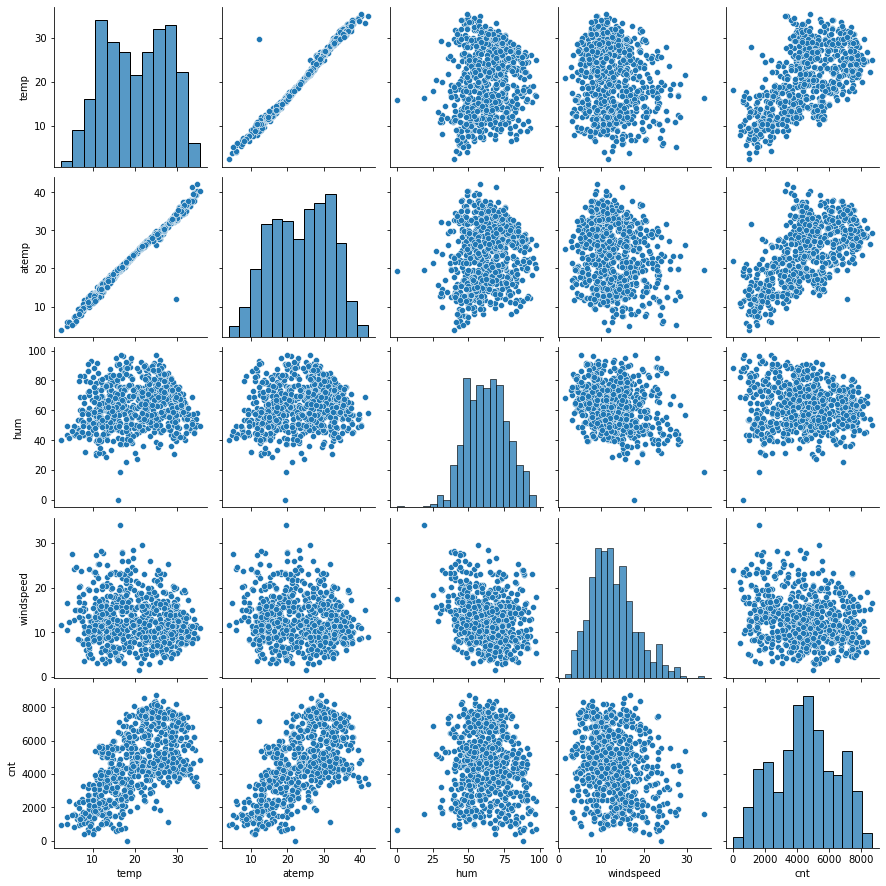

In [17]:
# Let's create the pair plot of all the data:
sns.pairplot(df)
plt.show()

In [18]:
#Check the correlation values between the variables
correlation_matrix =  df.corr(method = 'pearson')
print(correlation_matrix)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000


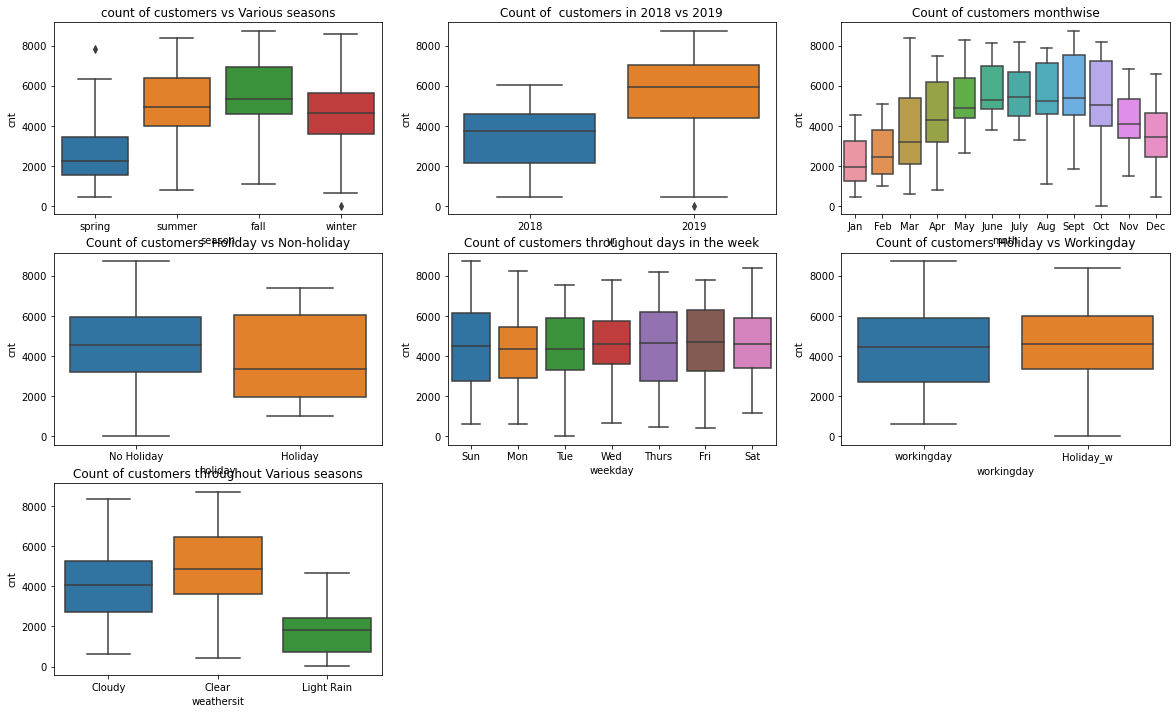

In [19]:
# Plotting box plot for categorical variables against 'cnt' as it is our target variable
plt.figure(figsize=(20,12)) ## to control the figure size

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df).set_title('count of customers vs Various seasons')

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df).set_title('Count of  customers in 2018 vs 2019')

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df).set_title('Count of customers monthwise')

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df).set_title('Count of customers  Holiday vs Non-holiday')

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df).set_title('Count of customers throughout days in the week')

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df).set_title('Count of customers Holiday vs Workingday')

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=df).set_title('Count of customers throughout Various seasons')

plt.show()

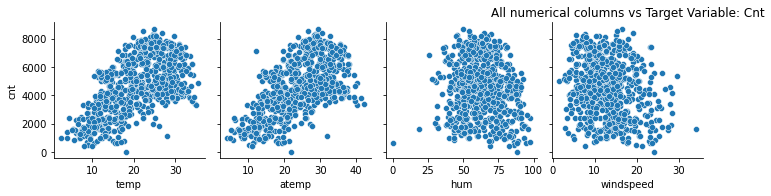

In [20]:
# Plotting scatter plot for numerical variables against our target variable 'cnt'
sns.pairplot(df,x_vars=["temp", "atemp", "hum",'windspeed'], y_vars=['cnt'])
plt.title("All numerical columns vs Target Variable: Cnt")
plt.show()

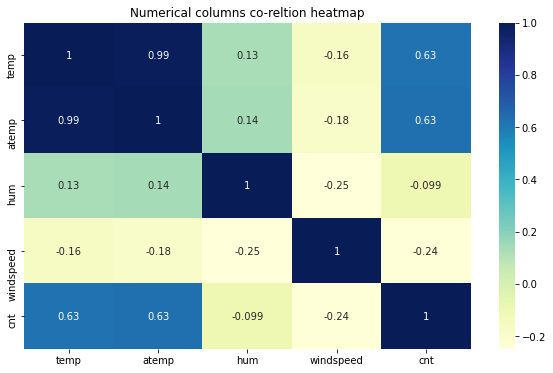

In [21]:
# Heatmap of all numerical variables against each other to see their corelations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.title("Numerical columns co-reltion heatmap")
plt.show()

## Data Prepartion:-

In [22]:
# 1. Convert the categorical data into dummy variables 
# Create a new dataframe to store them
cat_vars=pd.get_dummies(df[['yr','holiday','workingday','season','mnth','weekday','weathersit']],drop_first=True)
cat_vars.head()

,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [23]:
# We then join orignal data and the dummy variable dataframe 'status'.
df=pd.concat([df,cat_vars],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,16.652113,801,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,spring,2018,Jan,No Holiday,Tue,Holiday_w,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,No Holiday,Wed,Holiday_w,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,No Holiday,Thurs,Holiday_w,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [24]:
#Drop the columns of which  dummy variables have been created.
df = df.drop(['yr','holiday','workingday','season','mnth','weekday','weathersit'],axis=1)
df.head()

,temp,atemp,hum,windspeed,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [25]:
# Create df_train and df_test split from the dataframe and check their shape
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Scalling the Object:- 
There are two ways to rescale the data. 
                                 
1-Min-Max:--scalling(normalization):compresses data between 0 and 1
          
2- Standardisation(mean-0, sigma-1)sigme is standard deviation
 
 Here we are going to follow Min-Max approach.                          

In [26]:
# Create an object to be scaled
scaler=MinMaxScaler()

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temp                   510 non-null    float64
 1   atemp                  510 non-null    float64
 2   hum                    510 non-null    float64
 3   windspeed              510 non-null    float64
 4   cnt                    510 non-null    int64  
 5   yr_2019                510 non-null    uint8  
 6   holiday_No Holiday     510 non-null    uint8  
 7   workingday_workingday  510 non-null    uint8  
 8   season_spring          510 non-null    uint8  
 9   season_summer          510 non-null    uint8  
 10  season_winter          510 non-null    uint8  
 11  mnth_Aug               510 non-null    uint8  
 12  mnth_Dec               510 non-null    uint8  
 13  mnth_Feb               510 non-null    uint8  
 14  mnth_Jan               510 non-null    uint8  
 15  mnth

In [28]:
# Make list of all the variables to be scaled
var_scale=['temp','atemp','hum','windspeed','cnt']

In [29]:
# Scale all the numeric variables between 0 to 1
df_train[var_scale]=scaler.fit_transform(df_train[var_scale]) 
df_train.head()


,temp,atemp,hum,windspeed,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
576,0.815169,0.766351,0.725633,0.264686,0.827658,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


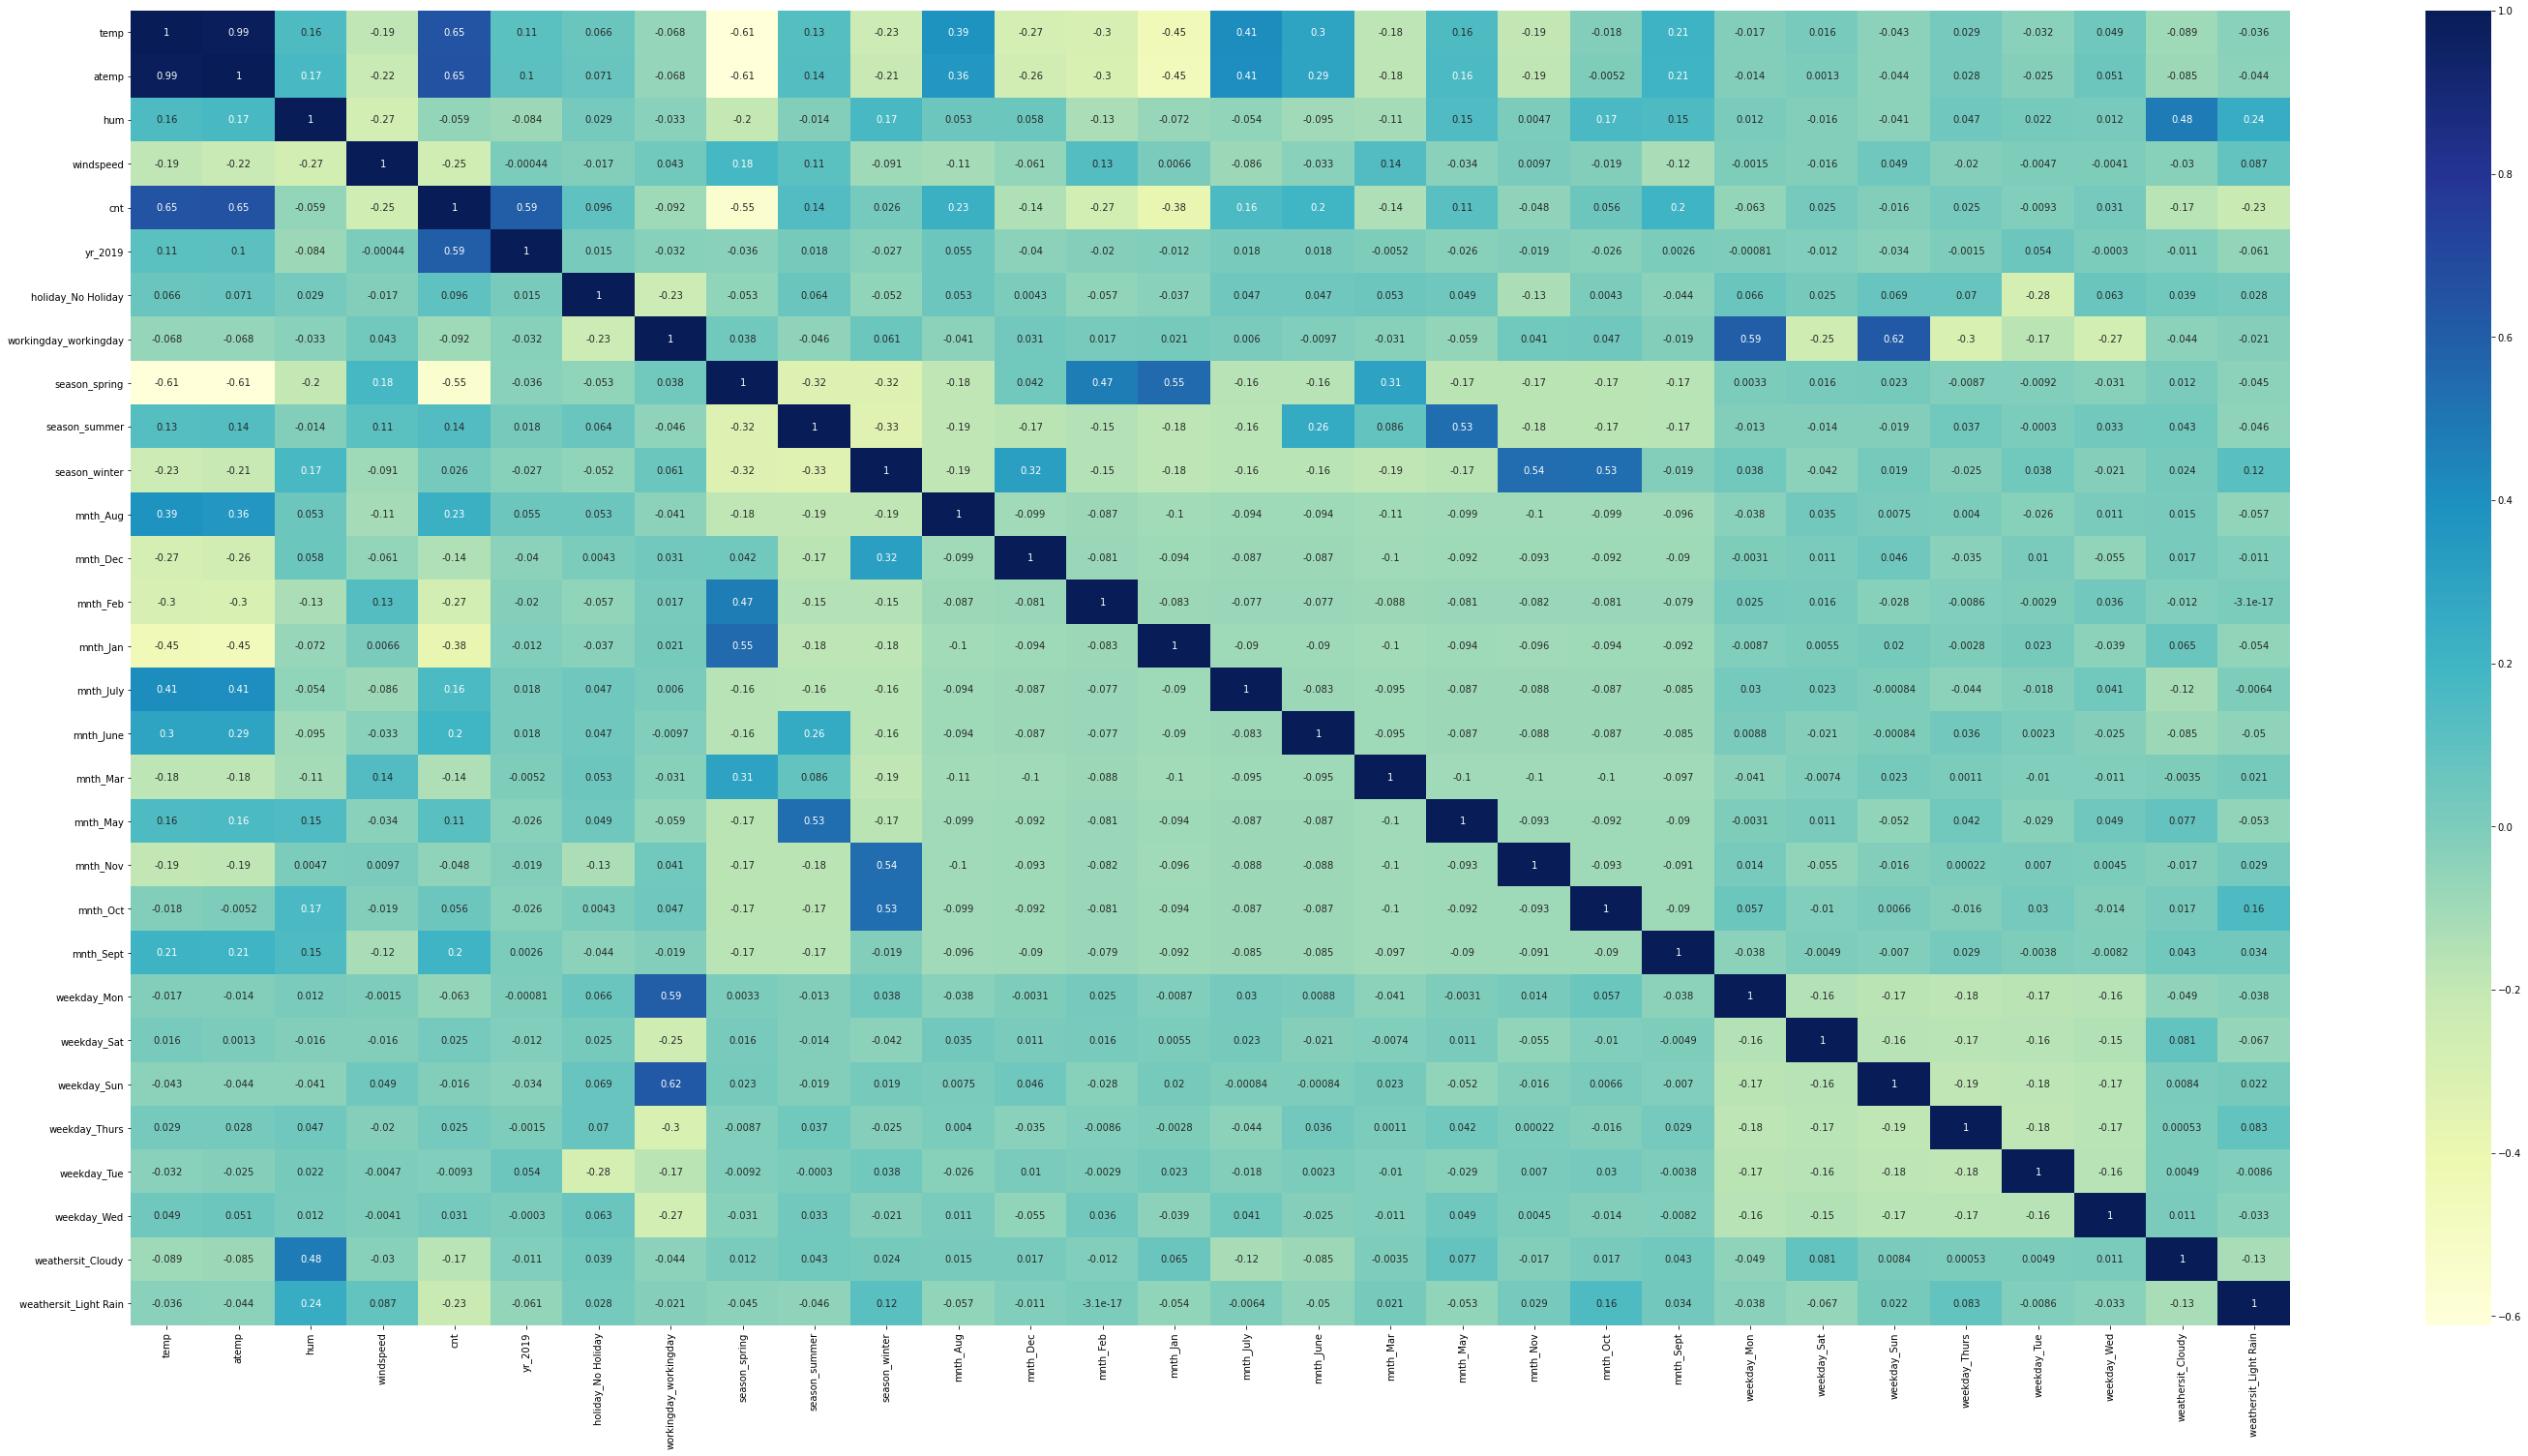

In [30]:
# Plot the co-relation graph to check the co-relation between dumy variables
plt.figure(figsize=(50,25))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()


In [31]:
# Split df_train data into X_train and y_train
y_train= df_train.pop('cnt')
X_train= df_train


## Trainnig the Data:- 

Backward Selection:- In `Backward Selection`, We use all the variables to build the very first model and them with the help of p- values and VIF values we will drop variables, which is also called `Feature selection Process`.

### Addinng all the variables to the model:-


In [32]:
# let's have a look fo all the variables in main datafame
df.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'yr_2019',
       'holiday_No Holiday', 'workingday_workingday', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')

In [33]:
# Build the model with all the variables
X_train_sm = sm.add_constant(X_train)

# Create teh model - 
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# params
lr_model.params

const                    0.220034
temp                     0.387984
atemp                    0.059045
hum                     -0.152016
windspeed               -0.183604
yr_2019                  0.232539
holiday_No Holiday       0.109806
workingday_workingday    0.024426
season_spring           -0.045355
season_summer            0.042369
season_winter            0.107081
mnth_Aug                 0.022270
mnth_Dec                -0.044274
mnth_Feb                -0.032316
mnth_Jan                -0.063064
mnth_July               -0.032657
mnth_June                0.006012
mnth_Mar                 0.001555
mnth_May                 0.025541
mnth_Nov                -0.039818
mnth_Oct                 0.007713
mnth_Sept                0.086761
weekday_Mon             -0.070010
weekday_Sat              0.009730
weekday_Sun             -0.015792
weekday_Thurs            0.003833
weekday_Tue             -0.011894
weekday_Wed             -0.008708
weathersit_Cloudy       -0.059521
weathersit_Lig

In [34]:
# Let's check the summary:-
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.81e-180
Time:                        20:32:53   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2200      0.040      5.449      0.000       0.141       0.299
temp                      0.3880      0.142      2.727      0.007       0.108       0.668
atemp                     0.0590      0.138      0.426      0.670      -0.213       0.331
hum                      -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                -0.1836      0.026     -6.962      0.000      -0.235      -0.132
yr_2019                   0.2325      0.008     28.794      0.000       0.217       0.248
holiday_No Holiday        0.1098      0.018      6.039      0.000       0.074       0.146
workingday_workingday     0.0244      0.015      1.677      0.094      -0.004       0.053
season_spring            -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_summer             0.0424      0.026      1.617      0.107      -0.009       0.094
season_winter             0.1071      0.028      3.826      0.000       0.052       0.162
mnth_Aug                  0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_Dec                 -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_Feb                 -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_Jan                 -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_July                -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_June                 0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_Mar                  0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_May                  0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_Nov                 -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_Oct                  0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sept                 0.0868      0.032      2.711      0.007       0.024       0.150
weekday_Mon              -0.0700      0.018     -3.843      0.000      -0.106      -0.034
weekday_Sat               0.0097      0.016      0.623      0.534      -0.021       0.040
weekday_Sun              -0.0158      0.018     -0.872      0.384      -0.051       0.020
weekday_Thurs             0.0038      0.015      0.261      0.794      -0.025       0.033
weekday_Tue              -0.0119      0.015     -0.785      0.433      -0.042       0.018
weekday_Wed              -0.0087      0.015     -0.564      0.573      -0.039       0.022
weathersit_Cloudy        -0.0595      0.010     -5.701      0.000      -0.080      -0.039
weathersit_Light Rain    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       84.

### Check for multicollinearity in the data:-

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calculate_vif_(X, thresh=5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
    
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True
        if len(variables) == 1:
            return X[cols[variables]]
            break
    
    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [36]:
# Let's Check the 'VIF' Values:-
vif = calculate_vif_(X_train)

dropping 'holiday_No Holiday' at index: 5
dropping 'temp' at index: 0
dropping 'hum' at index: 1
dropping 'atemp' at index: 0
dropping 'workingday_workingday' at index: 2
dropping 'season_winter' at index: 4
dropping 'season_spring' at index: 2
Remaining variables:
Index(['windspeed', 'yr_2019', 'season_summer', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')


So, To drop the variables on the basis of p-values and VIF, we are going to follow three approaches:-

1- High p value and high VIF

2- High p value and low VIF

3- Low p value and high VIF

As We 'atemp' has more higher P value and higher VIF value, it's better to drop it at the this moment.

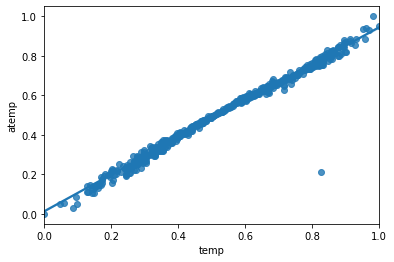

In [37]:
# Let's use reg plot to see the linearity between 'temp' and 'atemp' variables
sns.regplot(x='temp',y="atemp",data=X_train)
plt.show()

From this `regplot` we can observe , `temp` and `atemp` are highly correlated so it will cause `multicoliarity`. So it's good idea to drop `atemp` as `temp` is still more strong and independent variable.

In [38]:
# Drop Variable 'atemp'
x = X_train.drop('atemp',axis = 1)

In [39]:
# Create another model without 'atemp'
#Adding the constant
X_train_sm = sm.add_constant(x)
# Create model
lr = sm.OLS(y_train,X_train_sm)

# fit
lr_model = lr.fit()
# check summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.00e-181
Time:                        20:32:55   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2199      0.040      5.450      0.000       0.141       0.299
temp                      0.4454      0.046      9.628      0.000       0.354       0.536
hum                      -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                -0.1860      0.026     -7.226      0.000      -0.237      -0.135
yr_2019                   0.2324      0.008     28.819      0.000       0.217       0.248
holiday_No Holiday        0.1103      0.018      6.081      0.000       0.075       0.146
workingday_workingday     0.0241      0.015      1.661      0.097      -0.004       0.053
season_spring            -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer             0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter             0.1076      0.028      3.853      0.000       0.053       0.163
mnth_Aug                  0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_Dec                 -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_Feb                 -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan                 -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_July                -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_June                 0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_Mar                  0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May                  0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_Nov                 -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_Oct                  0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sept                 0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Mon              -0.0698      0.018     -3.838      0.000      -0.106      -0.034
weekday_Sat               0.0091      0.016      0.588      0.557      -0.021       0.040
weekday_Sun              -0.0156      0.018     -0.864      0.388      -0.051       0.020
weekday_Thurs             0.0036      0.015      0.248      0.804      -0.025       0.032
weekday_Tue              -0.0118      0.015     -0.780      0.436      -0.042       0.018
weekday_Wed              -0.0088      0.015     -0.571      0.568      -0.039       0.022
weathersit_Cloudy        -0.0596      0.010     -5.709      0.000      -0.080      -0.039
weathersit_Light Rain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarqu

In [40]:
vif  = calculate_vif_(x)

dropping 'holiday_No Holiday' at index: 4
dropping 'hum' at index: 1
dropping 'temp' at index: 0
dropping 'workingday_workingday' at index: 2
dropping 'season_winter' at index: 4
dropping 'season_spring' at index: 2
Remaining variables:
Index(['windspeed', 'yr_2019', 'season_summer', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')


In [41]:
# let's drop ''workingday_workingday' as it has high p value and high p vif
x = x.drop('workingday_workingday',axis =1)

In [42]:
# Create another model without 'workingday_workingday'
#Adding the constant
X_train_sm = sm.add_constant(x)
# Create model
lr = sm.OLS(y_train,X_train_sm)

# fit
lr_model = lr.fit()
# check summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.00e-181
Time:                        20:32:55   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2440      0.052      4.675      0.000       0.141       0.347
temp                      0.4454      0.046      9.628      0.000       0.354       0.536
hum                      -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                -0.1860      0.026     -7.226      0.000      -0.237      -0.135
yr_2019                   0.2324      0.008     28.819      0.000       0.217       0.248
holiday_No Holiday        0.0861      0.027      3.234      0.001       0.034       0.138
season_spring            -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer             0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter             0.1076      0.028      3.853      0.000       0.053       0.163
mnth_Aug                  0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_Dec                 -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_Feb                 -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan                 -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_July                -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_June                 0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_Mar                  0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May                  0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_Nov                 -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_Oct                  0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sept                 0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Mon              -0.0457      0.015     -3.016      0.003      -0.075      -0.016
weekday_Sat               0.0091      0.016      0.588      0.557      -0.021       0.040
weekday_Sun               0.0085      0.015      0.575      0.565      -0.021       0.038
weekday_Thurs             0.0036      0.015      0.248      0.804      -0.025       0.032
weekday_Tue              -0.0118      0.015     -0.780      0.436      -0.042       0.018
weekday_Wed              -0.0088      0.015     -0.571      0.568      -0.039       0.022
weathersit_Cloudy        -0.0596      0.010     -5.709      0.000      -0.080      -0.039
weathersit_Light Rain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):       

In [43]:
# Let's check vif 
vif = calculate_vif_(x)

dropping 'hum' at index: 1
dropping 'holiday_No Holiday' at index: 3
dropping 'temp' at index: 0
dropping 'season_winter' at index: 4
dropping 'season_spring' at index: 2
Remaining variables:
Index(['windspeed', 'yr_2019', 'season_summer', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')


In [44]:
# Let's remove 'season_spring' as it has high p value and high Vif
x = x.drop('season_spring',axis =1)

In [45]:
# Create another model without 'season_spring'
#Adding the constant
X_train_sm = sm.add_constant(x)
# Create model
lr = sm.OLS(y_train,X_train_sm)

# fit
lr_model = lr.fit()
# check summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     106.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          8.68e-182
Time:                        20:32:56   Log-Likelihood:                 525.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     483   BIC:                            -883.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2161      0.049      4.427      0.000       0.120       0.312
temp                      0.4542      0.046      9.889      0.000       0.364       0.545
hum                      -0.1536      0.039     -3.983      0.000      -0.229      -0.078
windspeed                -0.1891      0.026     -7.360      0.000      -0.240      -0.139
yr_2019                   0.2321      0.008     28.751      0.000       0.216       0.248
holiday_No Holiday        0.0871      0.027      3.268      0.001       0.035       0.140
season_summer             0.0686      0.020      3.462      0.001       0.030       0.107
season_winter             0.1327      0.022      5.930      0.000       0.089       0.177
mnth_Aug                  0.0429      0.030      1.430      0.153      -0.016       0.102
mnth_Dec                 -0.0486      0.034     -1.449      0.148      -0.115       0.017
mnth_Feb                 -0.0499      0.031     -1.619      0.106      -0.111       0.011
mnth_Jan                 -0.0803      0.032     -2.538      0.011      -0.142      -0.018
mnth_July                -0.0119      0.032     -0.374      0.708      -0.074       0.050
mnth_June                 0.0111      0.024      0.454      0.650      -0.037       0.059
mnth_Mar                 -0.0105      0.023     -0.450      0.653      -0.056       0.035
mnth_May                  0.0231      0.021      1.100      0.272      -0.018       0.064
mnth_Nov                 -0.0387      0.036     -1.062      0.289      -0.110       0.033
mnth_Oct                  0.0075      0.036      0.208      0.835      -0.063       0.078
mnth_Sept                 0.1039      0.030      3.507      0.000       0.046       0.162
weekday_Mon              -0.0465      0.015     -3.063      0.002      -0.076      -0.017
weekday_Sat               0.0088      0.016      0.565      0.573      -0.022       0.039
weekday_Sun               0.0074      0.015      0.499      0.618      -0.022       0.036
weekday_Thurs             0.0029      0.015      0.196      0.845      -0.026       0.032
weekday_Tue              -0.0117      0.015     -0.772      0.441      -0.041       0.018
weekday_Wed              -0.0092      0.015     -0.599      0.549      -0.040       0.021
weathersit_Cloudy        -0.0591      0.010     -5.660      0.000      -0.080      -0.039
weathersit_Light Rain    -0.2533      0.026     -9.610      0.000      -0.305      -0.201
==============================================================================
Omnibus:                       81.173   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.633
Skew:                          -0.783   Prob(JB):                     2.03e-48
Kurtosis:                       5.808   Cond. No.                  

In [46]:
# Let's check the VIF again:-
vif = calculate_vif_(x)

dropping 'hum' at index: 1
dropping 'temp' at index: 0
dropping 'holiday_No Holiday' at index: 2
dropping 'season_winter' at index: 3
Remaining variables:
Index(['windspeed', 'yr_2019', 'season_summer', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')


1 High p- value, high VIF So above given condition is no gainner so we should surely deop this variable, High p values means less significant
2 High-low:
High p value, low VIF : remove these first which
OR Low p value , high VIF : remove these after the once above
3 low p value and low VIF
which means it not correlated it significant so keep it

In [47]:
# Let's drop 'mnth_Oct' as it has very high p value
x = x.drop('mnth_Oct',axis = 1)

In [48]:
# Let's create another model without variable 'mnth_Oct'
# Adding the constant:-
X_train_sm = sm.add_constant(x)
# Creat  the model
lr = sm.OLS(y_train, X_train_sm)
# Fit the model
lr_model = lr.fit()
# Check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          8.32e-183
Time:                        20:32:56   Log-Likelihood:                 525.82
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     484   BIC:                            -889.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2195      0.046      4.780      0.000       0.129       0.310
temp                      0.4539      0.046      9.898      0.000       0.364       0.544
hum                      -0.1527      0.038     -3.991      0.000      -0.228      -0.078
windspeed                -0.1890      0.026     -7.366      0.000      -0.239      -0.139
yr_2019                   0.2320      0.008     28.796      0.000       0.216       0.248
holiday_No Holiday        0.0868      0.027      3.265      0.001       0.035       0.139
season_summer             0.0663      0.016      4.026      0.000       0.034       0.099
season_winter             0.1356      0.018      7.654      0.000       0.101       0.170
mnth_Aug                  0.0395      0.025      1.569      0.117      -0.010       0.089
mnth_Dec                 -0.0542      0.020     -2.680      0.008      -0.094      -0.014
mnth_Feb                 -0.0535      0.026     -2.073      0.039      -0.104      -0.003
mnth_Jan                 -0.0839      0.027     -3.153      0.002      -0.136      -0.032
mnth_July                -0.0152      0.027     -0.557      0.578      -0.069       0.038
mnth_June                 0.0092      0.023      0.406      0.685      -0.035       0.054
mnth_Mar                 -0.0131      0.019     -0.674      0.500      -0.051       0.025
mnth_May                  0.0219      0.020      1.085      0.278      -0.018       0.062
mnth_Nov                 -0.0451      0.019     -2.316      0.021      -0.083      -0.007
mnth_Sept                 0.0997      0.022      4.539      0.000       0.057       0.143
weekday_Mon              -0.0465      0.015     -3.067      0.002      -0.076      -0.017
weekday_Sat               0.0088      0.016      0.563      0.574      -0.022       0.039
weekday_Sun               0.0074      0.015      0.499      0.618      -0.022       0.036
weekday_Thurs             0.0028      0.015      0.193      0.847      -0.026       0.032
weekday_Tue              -0.0118      0.015     -0.777      0.437      -0.041       0.018
weekday_Wed              -0.0093      0.015     -0.605      0.546      -0.040       0.021
weathersit_Cloudy        -0.0591      0.010     -5.673      0.000      -0.080      -0.039
weathersit_Light Rain    -0.2531      0.026     -9.617      0.000      -0.305      -0.201
==============================================================================
Omnibus:                       80.490   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.047
Skew:                          -0.777   Prob(JB):                     7.39e-48
Kurtosis:                       5.792   Cond. No.                         30.8
==============================================================================

In [49]:
# let's check VIF again
vif = calculate_vif_(x)

dropping 'temp' at index: 0
dropping 'holiday_No Holiday' at index: 3
dropping 'hum' at index: 0
Remaining variables:
Index(['windspeed', 'yr_2019', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')


In [50]:
# let's drop 'weekday_Thurs' as it has very high p value
x = x.drop('weekday_Thurs',axis = 1)

In [51]:
# Let's create the model without 'weekday_Thurs' variable again
# Adding the constant
X_train_sm = sm.add_constant(x)
# Create the model
lr = sm.OLS(y_train,X_train_sm)
# Fit the model
lr_model = lr.fit()
# Check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          7.77e-184
Time:                        20:32:57   Log-Likelihood:                 525.80
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     485   BIC:                            -895.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2207      0.045      4.858      0.000       0.131       0.310
temp                      0.4538      0.046      9.906      0.000       0.364       0.544
hum                      -0.1524      0.038     -3.991      0.000      -0.227      -0.077
windspeed                -0.1891      0.026     -7.373      0.000      -0.239      -0.139
yr_2019                   0.2320      0.008     28.827      0.000       0.216       0.248
holiday_No Holiday        0.0870      0.027      3.280      0.001       0.035       0.139
season_summer             0.0663      0.016      4.032      0.000       0.034       0.099
season_winter             0.1356      0.018      7.666      0.000       0.101       0.170
mnth_Aug                  0.0395      0.025      1.571      0.117      -0.010       0.089
mnth_Dec                 -0.0544      0.020     -2.694      0.007      -0.094      -0.015
mnth_Feb                 -0.0534      0.026     -2.074      0.039      -0.104      -0.003
mnth_Jan                 -0.0839      0.027     -3.158      0.002      -0.136      -0.032
mnth_July                -0.0152      0.027     -0.557      0.578      -0.069       0.038
mnth_June                 0.0093      0.023      0.410      0.682      -0.035       0.054
mnth_Mar                 -0.0132      0.019     -0.680      0.497      -0.051       0.025
mnth_May                  0.0220      0.020      1.089      0.277      -0.018       0.062
mnth_Nov                 -0.0452      0.019     -2.327      0.020      -0.083      -0.007
mnth_Sept                 0.0997      0.022      4.542      0.000       0.057       0.143
weekday_Mon              -0.0480      0.013     -3.741      0.000      -0.073      -0.023
weekday_Sat               0.0072      0.013      0.541      0.589      -0.019       0.033
weekday_Sun               0.0058      0.012      0.470      0.639      -0.019       0.030
weekday_Tue              -0.0133      0.013     -1.029      0.304      -0.039       0.012
weekday_Wed              -0.0109      0.013     -0.828      0.408      -0.037       0.015
weathersit_Cloudy        -0.0591      0.010     -5.677      0.000      -0.080      -0.039
weathersit_Light Rain    -0.2530      0.026     -9.625      0.000      -0.305      -0.201
==============================================================================
Omnibus:                       80.799   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.214
Skew:                          -0.780   Prob(JB):                     4.12e-48
Kurtosis:                       5.800   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [52]:
# Let's check the VIF again
vif = calculate_vif_(x)

dropping 'temp' at index: 0
dropping 'holiday_No Holiday' at index: 3
dropping 'hum' at index: 0
Remaining variables:
Index(['windspeed', 'yr_2019', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')


In [53]:
# let's try another way to check VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,temp,37.45
1,hum,35.98
4,holiday_No Holiday,29.47
2,windspeed,4.95
6,season_winter,4.76
5,season_summer,3.97
7,mnth_Aug,3.95
11,mnth_July,3.71
10,mnth_Jan,2.95
12,mnth_June,2.54


In [54]:
# Let's drop 'mnth_June' as it has high p value
x = x.drop('mnth_June',axis =1)

In [55]:
# Let's create the model without the variable 'mnth_June'
# Add the constant
X_train_sm = sm.add_constant(x)
# Create the model
lr = sm.OLS(y_train,X_train_sm)
# fit the model
lr_model = lr.fit()
# check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          7.58e-185
Time:                        20:32:57   Log-Likelihood:                 525.72
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     486   BIC:                            -901.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2198      0.045      4.847      0.000       0.131       0.309
temp                      0.4637      0.039     11.911      0.000       0.387       0.540
hum                      -0.1546      0.038     -4.094      0.000      -0.229      -0.080
windspeed                -0.1905      0.025     -7.502      0.000      -0.240      -0.141
yr_2019                   0.2317      0.008     28.936      0.000       0.216       0.247
holiday_No Holiday        0.0880      0.026      3.331      0.001       0.036       0.140
season_summer             0.0660      0.016      4.022      0.000       0.034       0.098
season_winter             0.1333      0.017      7.950      0.000       0.100       0.166
mnth_Aug                  0.0335      0.020      1.643      0.101      -0.007       0.074
mnth_Dec                 -0.0541      0.020     -2.686      0.007      -0.094      -0.015
mnth_Feb                 -0.0543      0.026     -2.118      0.035      -0.105      -0.004
mnth_Jan                 -0.0842      0.027     -3.171      0.002      -0.136      -0.032
mnth_July                -0.0219      0.022     -0.997      0.319      -0.065       0.021
mnth_Mar                 -0.0153      0.019     -0.816      0.415      -0.052       0.022
mnth_May                  0.0178      0.017      1.021      0.308      -0.016       0.052
mnth_Nov                 -0.0448      0.019     -2.311      0.021      -0.083      -0.007
mnth_Sept                 0.0954      0.019      4.968      0.000       0.058       0.133
weekday_Mon              -0.0480      0.013     -3.740      0.000      -0.073      -0.023
weekday_Sat               0.0071      0.013      0.535      0.593      -0.019       0.033
weekday_Sun               0.0060      0.012      0.480      0.631      -0.018       0.030
weekday_Tue              -0.0131      0.013     -1.020      0.308      -0.038       0.012
weekday_Wed              -0.0110      0.013     -0.837      0.403      -0.037       0.015
weathersit_Cloudy        -0.0588      0.010     -5.667      0.000      -0.079      -0.038
weathersit_Light Rain    -0.2528      0.026     -9.627      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       79.988   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.122
Skew:                          -0.777   Prob(JB):                     5.26e-47
Kurtosis:                       5.760   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# let's check the VIF:-
vif = calculate_vif_(x)

dropping 'hum' at index: 1
dropping 'holiday_No Holiday' at index: 3
dropping 'temp' at index: 0
Remaining variables:
Index(['windspeed', 'yr_2019', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')


In [57]:
# Let's drop 'weekday_Sun' as it has very high p values
x = x.drop('weekday_Sun',axis = 1)


In [58]:
# Let's create the model without the variable 'weekday_Sun'
# Adding the constant
X_train_sm = sm.add_constant(x)
# Create the Model:-
lr = sm.OLS(y_train,X_train_sm)
# fit the model
lr_model = lr.fit()
# Check the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          7.44e-186
Time:                        20:32:57   Log-Likelihood:                 525.59
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     487   BIC:                            -907.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2221      0.045      4.930      0.000       0.134       0.311
temp                      0.4628      0.039     11.911      0.000       0.386       0.539
hum                      -0.1551      0.038     -4.109      0.000      -0.229      -0.081
windspeed                -0.1900      0.025     -7.495      0.000      -0.240      -0.140
yr_2019                   0.2317      0.008     28.955      0.000       0.216       0.247
holiday_No Holiday        0.0883      0.026      3.345      0.001       0.036       0.140
season_summer             0.0661      0.016      4.033      0.000       0.034       0.098
season_winter             0.1336      0.017      7.983      0.000       0.101       0.167
mnth_Aug                  0.0338      0.020      1.662      0.097      -0.006       0.074
mnth_Dec                 -0.0542      0.020     -2.692      0.007      -0.094      -0.015
mnth_Feb                 -0.0545      0.026     -2.129      0.034      -0.105      -0.004
mnth_Jan                 -0.0843      0.027     -3.179      0.002      -0.136      -0.032
mnth_July                -0.0213      0.022     -0.973      0.331      -0.064       0.022
mnth_Mar                 -0.0155      0.019     -0.824      0.410      -0.052       0.021
mnth_May                  0.0176      0.017      1.008      0.314      -0.017       0.052
mnth_Nov                 -0.0454      0.019     -2.344      0.019      -0.083      -0.007
mnth_Sept                 0.0954      0.019      4.973      0.000       0.058       0.133
weekday_Mon              -0.0501      0.012     -4.155      0.000      -0.074      -0.026
weekday_Sat               0.0050      0.013      0.400      0.690      -0.020       0.030
weekday_Tue              -0.0152      0.012     -1.251      0.212      -0.039       0.009
weekday_Wed              -0.0131      0.012     -1.054      0.292      -0.037       0.011
weathersit_Cloudy        -0.0587      0.010     -5.660      0.000      -0.079      -0.038
weathersit_Light Rain    -0.2532      0.026     -9.652      0.000      -0.305      -0.202
==============================================================================
Omnibus:                       78.394   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.279
Skew:                          -0.758   Prob(JB):                     1.32e-46
Kurtosis:                       5.765   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Let's check the VIf 
vit = calculate_vif_(x)

dropping 'hum' at index: 1
dropping 'holiday_No Holiday' at index: 3
dropping 'temp' at index: 0
Remaining variables:
Index(['windspeed', 'yr_2019', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')


In [60]:
# Let's check the vif in numerical values:-
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,hum,34.86
4,holiday_No Holiday,29.01
0,temp,25.64
2,windspeed,4.79
6,season_winter,4.20
5,season_summer,3.94
10,mnth_Jan,2.93
7,mnth_Aug,2.58
11,mnth_July,2.39
20,weathersit_Cloudy,2.34


In [61]:
# Dropping 'weekday_Sat' as it has very high p value
x = x.drop('weekday_Sat',axis = 1)

In [62]:
# Creating the model without the variable 'weekday_Sat'
# Adding the constant
X_train_sm = sm.add_constant(x)
# Creating the model
lr = sm.OLS(y_train, X_train_sm)
# Fit the model
lr_model = lr.fit()
# Checking the summary
lr_model.summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          6.89e-187
Time:                        20:32:58   Log-Likelihood:                 525.51
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     488   BIC:                            -913.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2239      0.045      4.998      0.000       0.136       0.312
temp                      0.4626      0.039     11.916      0.000       0.386       0.539
hum                      -0.1554      0.038     -4.124      0.000      -0.229      -0.081
windspeed                -0.1901      0.025     -7.508      0.000      -0.240      -0.140
yr_2019                   0.2316      0.008     28.979      0.000       0.216       0.247
holiday_No Holiday        0.0880      0.026      3.340      0.001       0.036       0.140
season_summer             0.0660      0.016      4.029      0.000       0.034       0.098
season_winter             0.1337      0.017      7.991      0.000       0.101       0.167
mnth_Aug                  0.0339      0.020      1.666      0.096      -0.006       0.074
mnth_Dec                 -0.0544      0.020     -2.703      0.007      -0.094      -0.015
mnth_Feb                 -0.0545      0.026     -2.130      0.034      -0.105      -0.004
mnth_Jan                 -0.0845      0.026     -3.191      0.002      -0.137      -0.032
mnth_July                -0.0211      0.022     -0.964      0.336      -0.064       0.022
mnth_Mar                 -0.0156      0.019     -0.835      0.404      -0.052       0.021
mnth_May                  0.0177      0.017      1.016      0.310      -0.017       0.052
mnth_Nov                 -0.0458      0.019     -2.370      0.018      -0.084      -0.008
mnth_Sept                 0.0952      0.019      4.970      0.000       0.058       0.133
weekday_Mon              -0.0512      0.012     -4.372      0.000      -0.074      -0.028
weekday_Tue              -0.0163      0.012     -1.384      0.167      -0.040       0.007
weekday_Wed              -0.0142      0.012     -1.179      0.239      -0.038       0.009
weathersit_Cloudy        -0.0584      0.010     -5.651      0.000      -0.079      -0.038
weathersit_Light Rain    -0.2538      0.026     -9.703      0.000      -0.305      -0.202
==============================================================================
Omnibus:                       78.613   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.677
Skew:                          -0.760   Prob(JB):                     1.08e-46
Kurtosis:                       5.766   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# let's check the VIF again:-
vif = calculate_vif_(x)

dropping 'hum' at index: 1
dropping 'holiday_No Holiday' at index: 3
dropping 'temp' at index: 0
Remaining variables:
Index(['windspeed', 'yr_2019', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Sept', 'weekday_Mon', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')


In [64]:
# Let's drop 'mnth_Mar' due to high p values
x = x.drop('mnth_Mar',axis = 1)

In [65]:
# Create the model again without 'mnth_Mar'
# Adding constant
X_train_sm = sm.add_constant(x)
# Creating the model
lr = sm.OLS(y_train,X_train_sm)
# fit the model
lr_model = lr.fit()
# Checking the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          8.11e-188
Time:                        20:32:58   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     489   BIC:                            -919.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2093      0.041      5.077      0.000       0.128       0.290
temp                      0.4774      0.035     13.830      0.000       0.410       0.545
hum                      -0.1579      0.038     -4.203      0.000      -0.232      -0.084
windspeed                -0.1901      0.025     -7.510      0.000      -0.240      -0.140
yr_2019                   0.2312      0.008     28.989      0.000       0.216       0.247
holiday_No Holiday        0.0874      0.026      3.319      0.001       0.036       0.139
season_summer             0.0711      0.015      4.684      0.000       0.041       0.101
season_winter             0.1403      0.015      9.542      0.000       0.111       0.169
mnth_Aug                  0.0389      0.019      2.001      0.046       0.001       0.077
mnth_Dec                 -0.0472      0.018     -2.597      0.010      -0.083      -0.011
mnth_Feb                 -0.0422      0.021     -2.018      0.044      -0.083      -0.001
mnth_Jan                 -0.0710      0.021     -3.388      0.001      -0.112      -0.030
mnth_July                -0.0171      0.021     -0.801      0.424      -0.059       0.025
mnth_May                  0.0199      0.017      1.153      0.250      -0.014       0.054
mnth_Nov                 -0.0415      0.019     -2.230      0.026      -0.078      -0.005
mnth_Sept                 0.1004      0.018      5.540      0.000       0.065       0.136
weekday_Mon              -0.0506      0.012     -4.328      0.000      -0.074      -0.028
weekday_Tue              -0.0162      0.012     -1.373      0.170      -0.039       0.007
weekday_Wed              -0.0142      0.012     -1.178      0.239      -0.038       0.009
weathersit_Cloudy        -0.0581      0.010     -5.630      0.000      -0.078      -0.038
weathersit_Light Rain    -0.2528      0.026     -9.678      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       76.225   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.642
Skew:                          -0.753   Prob(JB):                     3.29e-43
Kurtosis:                       5.634   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Let's drop 'mnth_July	' as it has high p value
x = x.drop('mnth_July',axis =1)

In [67]:
# Creating the model without the 'mnth_July'
# Adding the constant
X_train_sm = sm.add_constant(x)
# Creating the model
lr = sm.OLS(y_train,X_train_sm)
# fitting the model
lr_model = lr.fit()
# Checking the summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          9.05e-189
Time:                        20:32:58   Log-Likelihood:                 524.81
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -924.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2106      0.041      5.116      0.000       0.130       0.292
temp                      0.4638      0.030     15.449      0.000       0.405       0.523
hum                      -0.1556      0.037     -4.156      0.000      -0.229      -0.082
windspeed                -0.1887      0.025     -7.475      0.000      -0.238      -0.139
yr_2019                   0.2315      0.008     29.067      0.000       0.216       0.247
holiday_No Holiday        0.0865      0.026      3.289      0.001       0.035       0.138
season_summer             0.0764      0.014      5.584      0.000       0.050       0.103
season_winter             0.1438      0.014     10.259      0.000       0.116       0.171
mnth_Aug                  0.0476      0.016      2.955      0.003       0.016       0.079
mnth_Dec                 -0.0474      0.018     -2.609      0.009      -0.083      -0.012
mnth_Feb                 -0.0405      0.021     -1.948      0.052      -0.081       0.000
mnth_Jan                 -0.0703      0.021     -3.359      0.001      -0.111      -0.029
mnth_May                  0.0212      0.017      1.234      0.218      -0.013       0.055
mnth_Nov                 -0.0420      0.019     -2.258      0.024      -0.079      -0.005
mnth_Sept                 0.1068      0.016      6.558      0.000       0.075       0.139
weekday_Mon              -0.0509      0.012     -4.358      0.000      -0.074      -0.028
weekday_Tue              -0.0164      0.012     -1.395      0.164      -0.040       0.007
weekday_Wed              -0.0146      0.012     -1.217      0.224      -0.038       0.009
weathersit_Cloudy        -0.0586      0.010     -5.682      0.000      -0.079      -0.038
weathersit_Light Rain    -0.2538      0.026     -9.728      0.000      -0.305      -0.203
==============================================================================
Omnibus:                       78.568   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.511
Skew:                          -0.771   Prob(JB):                     3.90e-45
Kurtosis:                       5.692   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# checkig the VIF Value
vif = calculate_vif_(x)

dropping 'hum' at index: 1
dropping 'holiday_No Holiday' at index: 3
dropping 'temp' at index: 0
Remaining variables:
Index(['windspeed', 'yr_2019', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_May', 'mnth_Nov', 'mnth_Sept',
       'weekday_Mon', 'weekday_Tue', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')


In [69]:
# Checing VIF in the numerical form:-
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,hum,31.85
4,holiday_No Holiday,25.47
0,temp,16.71
2,windspeed,4.61
6,season_winter,3.14
5,season_summer,2.88
17,weathersit_Cloudy,2.30
10,mnth_Jan,2.13
3,yr_2019,2.10
12,mnth_Nov,1.84


In [70]:
# Dropping the variable 'weekday_Wed'
x = x.drop('weekday_Wed',axis = 1)

In [71]:
# Creating the model again after dropping the variable
# Adding the constant
X_train_sm = sm.add_constant(x)
# Creating the Model:-
lr = sm.OLS(y_train,X_train_sm)
# Fitting the Model
lr_model = lr.fit()
# Checking the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.49e-189
Time:                        20:32:58   Log-Likelihood:                 524.04
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2102      0.041      5.102      0.000       0.129       0.291
temp                      0.4629      0.030     15.417      0.000       0.404       0.522
hum                      -0.1572      0.037     -4.199      0.000      -0.231      -0.084
windspeed                -0.1888      0.025     -7.478      0.000      -0.238      -0.139
yr_2019                   0.2315      0.008     29.045      0.000       0.216       0.247
holiday_No Holiday        0.0858      0.026      3.260      0.001       0.034       0.137
season_summer             0.0763      0.014      5.572      0.000       0.049       0.103
season_winter             0.1435      0.014     10.231      0.000       0.116       0.171
mnth_Aug                  0.0479      0.016      2.970      0.003       0.016       0.080
mnth_Dec                 -0.0465      0.018     -2.560      0.011      -0.082      -0.011
mnth_Feb                 -0.0417      0.021     -2.005      0.046      -0.083      -0.001
mnth_Jan                 -0.0702      0.021     -3.349      0.001      -0.111      -0.029
mnth_May                  0.0208      0.017      1.210      0.227      -0.013       0.054
mnth_Nov                 -0.0421      0.019     -2.260      0.024      -0.079      -0.006
mnth_Sept                 0.1072      0.016      6.584      0.000       0.075       0.139
weekday_Mon              -0.0480      0.011     -4.197      0.000      -0.070      -0.026
weekday_Tue              -0.0138      0.012     -1.189      0.235      -0.037       0.009
weathersit_Cloudy        -0.0583      0.010     -5.655      0.000      -0.079      -0.038
weathersit_Light Rain    -0.2520      0.026     -9.671      0.000      -0.303      -0.201
==============================================================================
Omnibus:                       77.743   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.093
Skew:                          -0.752   Prob(JB):                     3.94e-46
Kurtosis:                       5.752   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Checking the VIF
vif = calculate_vif_(x)

dropping 'hum' at index: 1
dropping 'holiday_No Holiday' at index: 3
dropping 'temp' at index: 0
Remaining variables:
Index(['windspeed', 'yr_2019', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_May', 'mnth_Nov', 'mnth_Sept',
       'weekday_Mon', 'weekday_Tue', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')


In [73]:
# Checing VIF in the numerical form:-
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,hum,31.79
4,holiday_No Holiday,25.43
0,temp,16.70
2,windspeed,4.61
6,season_winter,3.14
5,season_summer,2.88
16,weathersit_Cloudy,2.30
10,mnth_Jan,2.13
3,yr_2019,2.10
12,mnth_Nov,1.84


In [74]:
# Let's Drop 'weekday_Tue'
x = x.drop('weekday_Tue',axis=1)

In [75]:
# Creating the model again after dropping the variable
# Adding  the 'Constant'
X_train_sm = sm.add_constant(x)
# Creating  the model:-
lr = sm.OLS(y_train,X_train_sm)
# Fitting the Model
lr_model = lr.fit()
# Checking the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.31e-190
Time:                        20:32:59   Log-Likelihood:                 523.31
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -934.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2005      0.040      4.963      0.000       0.121       0.280
temp                      0.4638      0.030     15.444      0.000       0.405       0.523
hum                      -0.1594      0.037     -4.261      0.000      -0.233      -0.086
windspeed                -0.1888      0.025     -7.474      0.000      -0.238      -0.139
yr_2019                   0.2308      0.008     29.017      0.000       0.215       0.246
holiday_No Holiday        0.0944      0.025      3.729      0.000       0.045       0.144
season_summer             0.0759      0.014      5.544      0.000       0.049       0.103
season_winter             0.1428      0.014     10.186      0.000       0.115       0.170
mnth_Aug                  0.0481      0.016      2.982      0.003       0.016       0.080
mnth_Dec                 -0.0459      0.018     -2.530      0.012      -0.082      -0.010
mnth_Feb                 -0.0414      0.021     -1.988      0.047      -0.082      -0.000
mnth_Jan                 -0.0701      0.021     -3.346      0.001      -0.111      -0.029
mnth_May                  0.0214      0.017      1.251      0.212      -0.012       0.055
mnth_Nov                 -0.0408      0.019     -2.196      0.029      -0.077      -0.004
mnth_Sept                 0.1078      0.016      6.618      0.000       0.076       0.140
weekday_Mon              -0.0458      0.011     -4.054      0.000      -0.068      -0.024
weathersit_Cloudy        -0.0580      0.010     -5.625      0.000      -0.078      -0.038
weathersit_Light Rain    -0.2512      0.026     -9.637      0.000      -0.302      -0.200
==============================================================================
Omnibus:                       76.042   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.882
Skew:                          -0.732   Prob(JB):                     1.19e-45
Kurtosis:                       5.755   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Checing VIF in the numerical form:-
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,hum,30.93
4,holiday_No Holiday,24.45
0,temp,16.63
2,windspeed,4.57
6,season_winter,3.12
5,season_summer,2.87
15,weathersit_Cloudy,2.29
10,mnth_Jan,2.12
3,yr_2019,2.09
12,mnth_Nov,1.84


In [77]:
# Dropping the 'mnth_May' due to high p values
x = x.drop('mnth_May',axis = 1)

In [78]:
# Creating the Model after droppinge the Variable:-
# Adding the Constant
X_train_sm = sm.add_constant(x)
# Creating the Model
lr = sm.OLS(y_train,X_train_sm)
# Fitting the Model
lr_model = lr.fit()
# Checking the Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.74e-191
Time:                        20:32:59   Log-Likelihood:                 522.50
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     493   BIC:                            -939.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1934      0.040      4.832      0.000       0.115       0.272
temp                      0.4685      0.030     15.716      0.000       0.410       0.527
hum                      -0.1527      0.037     -4.122      0.000      -0.225      -0.080
windspeed                -0.1900      0.025     -7.521      0.000      -0.240      -0.140
yr_2019                   0.2304      0.008     28.974      0.000       0.215       0.246
holiday_No Holiday        0.0950      0.025      3.753      0.000       0.045       0.145
season_summer             0.0834      0.012      6.768      0.000       0.059       0.108
season_winter             0.1428      0.014     10.178      0.000       0.115       0.170
mnth_Aug                  0.0469      0.016      2.913      0.004       0.015       0.079
mnth_Dec                 -0.0448      0.018     -2.472      0.014      -0.080      -0.009
mnth_Feb                 -0.0392      0.021     -1.891      0.059      -0.080       0.002
mnth_Jan                 -0.0680      0.021     -3.255      0.001      -0.109      -0.027
mnth_Nov                 -0.0397      0.019     -2.136      0.033      -0.076      -0.003
mnth_Sept                 0.1069      0.016      6.566      0.000       0.075       0.139
weekday_Mon              -0.0458      0.011     -4.060      0.000      -0.068      -0.024
weathersit_Cloudy        -0.0583      0.010     -5.650      0.000      -0.079      -0.038
weathersit_Light Rain    -0.2533      0.026     -9.737      0.000      -0.304      -0.202
==============================================================================
Omnibus:                       74.647   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.197
Skew:                          -0.736   Prob(JB):                     1.12e-42
Kurtosis:                       5.632   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Checking VIF in the numerical form again:-
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,hum,30.70
4,holiday_No Holiday,24.25
0,temp,16.54
2,windspeed,4.52
6,season_winter,3.12
5,season_summer,2.36
14,weathersit_Cloudy,2.29
10,mnth_Jan,2.12
3,yr_2019,2.08
11,mnth_Nov,1.84


So far i dropped the variable based on `high p value` and `low VIF`. But now I will drop variables based on `high VIF` and `low p values`.

In [80]:
# Dropping the 'hum' as it has very high VIF
x = x.drop('hum',axis=1)

In [81]:
# Creating the Model after dropping the Feature
# Adding the constant:-
X_train_sm = sm.add_constant(x)
# Creating the Model:-
lr = sm.OLS(y_train,X_train_sm)
# Fitting the model:-
lr_model = lr.fit()
# Checking the Summary:-
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.12e-188
Time:                        20:32:59   Log-Likelihood:                 513.86
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     494   BIC:                            -928.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1144      0.036      3.204      0.001       0.044       0.184
temp                      0.4395      0.029     14.932      0.000       0.382       0.497
windspeed                -0.1628      0.025     -6.572      0.000      -0.212      -0.114
yr_2019                   0.2340      0.008     29.144      0.000       0.218       0.250
holiday_No Holiday        0.0966      0.026      3.755      0.000       0.046       0.147
season_summer             0.0780      0.012      6.265      0.000       0.054       0.102
season_winter             0.1319      0.014      9.420      0.000       0.104       0.159
mnth_Aug                  0.0447      0.016      2.737      0.006       0.013       0.077
mnth_Dec                 -0.0525      0.018     -2.862      0.004      -0.088      -0.016
mnth_Feb                 -0.0449      0.021     -2.134      0.033      -0.086      -0.004
mnth_Jan                 -0.0778      0.021     -3.689      0.000      -0.119      -0.036
mnth_Nov                 -0.0398      0.019     -2.109      0.035      -0.077      -0.003
mnth_Sept                 0.1000      0.016      6.078      0.000       0.068       0.132
weekday_Mon              -0.0492      0.011     -4.298      0.000      -0.072      -0.027
weathersit_Cloudy        -0.0826      0.009     -9.609      0.000      -0.100      -0.066
weathersit_Light Rain    -0.2959      0.024    -12.198      0.000      -0.344      -0.248
==============================================================================
Omnibus:                       74.915   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.583
Skew:                          -0.730   Prob(JB):                     7.56e-44
Kurtosis:                       5.685   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# Checking the VIF again
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,holiday_No Holiday,19.79
0,temp,11.84
1,windspeed,4.49
5,season_winter,2.86
4,season_summer,2.24
2,yr_2019,2.07
9,mnth_Jan,1.81
10,mnth_Nov,1.81
6,mnth_Aug,1.63
13,weathersit_Cloudy,1.61


In [83]:
#Dropping 'holiday_No Holiday' variable:-
x = x.drop('holiday_No Holiday',axis = 1)


In [84]:
# Creating the Model after dropping the feature:-
# Adding the Constant
X_train_sm = sm.add_constant(x)
# Creating linear regression model
lr = sm.OLS(y_train,X_train_sm)
# Fitting the model
lr_model = lr.fit()
# Checking the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          8.10e-187
Time:                        20:32:59   Log-Likelihood:                 506.68
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     495   BIC:                            -919.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2106      0.025      8.362      0.000       0.161       0.260
temp                      0.4376      0.030     14.677      0.000       0.379       0.496
windspeed                -0.1645      0.025     -6.555      0.000      -0.214      -0.115
yr_2019                   0.2344      0.008     28.816      0.000       0.218       0.250
season_summer             0.0780      0.013      6.189      0.000       0.053       0.103
season_winter             0.1321      0.014      9.312      0.000       0.104       0.160
mnth_Aug                  0.0460      0.017      2.778      0.006       0.013       0.079
mnth_Dec                 -0.0546      0.019     -2.942      0.003      -0.091      -0.018
mnth_Feb                 -0.0503      0.021     -2.365      0.018      -0.092      -0.009
mnth_Jan                 -0.0821      0.021     -3.845      0.000      -0.124      -0.040
mnth_Nov                 -0.0485      0.019     -2.551      0.011      -0.086      -0.011
mnth_Sept                 0.0961      0.017      5.774      0.000       0.063       0.129
weekday_Mon              -0.0461      0.012     -3.986      0.000      -0.069      -0.023
weathersit_Cloudy        -0.0810      0.009     -9.315      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2922      0.025    -11.898      0.000      -0.340      -0.244
==============================================================================
Omnibus:                       86.641   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.228
Skew:                          -0.820   Prob(JB):                     9.26e-54
Kurtosis:                       5.967   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# Checking VIF:-
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,temp,5.19
1,windspeed,3.92
4,season_winter,2.63
2,yr_2019,2.06
3,season_summer,2.04
9,mnth_Nov,1.79
5,mnth_Aug,1.62
12,weathersit_Cloudy,1.57
6,mnth_Dec,1.41
10,mnth_Sept,1.35


In [86]:
# Dropping 'windspeed':-
x = x.drop('windspeed',axis =1)
    

In [87]:
# Creating the Model after dropping the feature with high VIF:-
# Adding the Constant 
X_train_sm = sm.add_constant(x)
# Creating the Model
lr = sm.OLS(y_train,X_train_sm)
# Fitting the Model:-
lr_model = lr.fit()
# Checking the Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.74e-179
Time:                        20:32:59   Log-Likelihood:                 485.45
No. Observations:                 510   AIC:                            -942.9
Df Residuals:                     496   BIC:                            -883.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1309      0.023      5.699      0.000       0.086       0.176
temp                      0.4761      0.030     15.639      0.000       0.416       0.536
yr_2019                   0.2328      0.008     27.490      0.000       0.216       0.249
season_summer             0.0774      0.013      5.895      0.000       0.052       0.103
season_winter             0.1437      0.015      9.810      0.000       0.115       0.173
mnth_Aug                  0.0518      0.017      3.008      0.003       0.018       0.086
mnth_Dec                 -0.0427      0.019     -2.218      0.027      -0.080      -0.005
mnth_Feb                 -0.0477      0.022     -2.155      0.032      -0.091      -0.004
mnth_Jan                 -0.0639      0.022     -2.899      0.004      -0.107      -0.021
mnth_Nov                 -0.0484      0.020     -2.448      0.015      -0.087      -0.010
mnth_Sept                 0.1060      0.017      6.143      0.000       0.072       0.140
weekday_Mon              -0.0457      0.012     -3.792      0.000      -0.069      -0.022
weathersit_Cloudy        -0.0796      0.009     -8.789      0.000      -0.097      -0.062
weathersit_Light Rain    -0.3060      0.025    -12.010      0.000      -0.356      -0.256
==============================================================================
Omnibus:                       84.396   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.790
Skew:                          -0.803   Prob(JB):                     1.04e-51
Kurtosis:                       5.910   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# Checking the VIF:-
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,temp,4.09
3,season_winter,2.61
1,yr_2019,2.05
2,season_summer,1.91
8,mnth_Nov,1.75
4,mnth_Aug,1.62
11,weathersit_Cloudy,1.56
5,mnth_Dec,1.38
9,mnth_Sept,1.34
10,weekday_Mon,1.17


Now we can see all p-values are less then 0.05, And all the VIF's values are less than 5 which is ideal for linear regression. Now , we can proceed with next step.

### Residual Analysis and Predictions:-¶
Before making the predictions, you need to be certain that the model is reliable. To that end, you need to first perform a residual analysis of the error terms and then move on to making the predictions on the test set; and finally, evaluate the model based on the predictions.

## Step 4 : Residual Analysis

In [89]:
# first we will compute the predicted values
y_train_pred = lr_model.predict(X_train_sm)

In [90]:
# So let's compute the residuals
res = y_train - y_train_pred


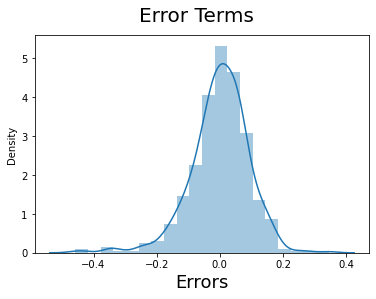

In [91]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

So, We can observe through this distplot that `Error` terms are normally distributed with mean value 0.

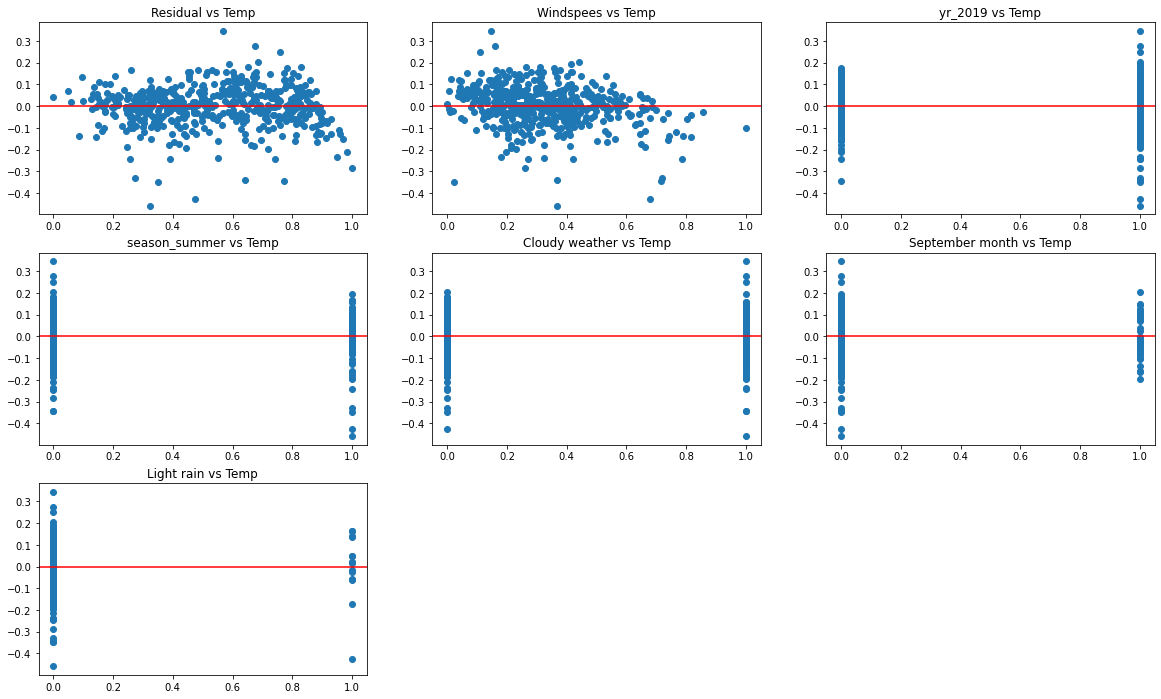

In [92]:
# Scatter Plot for all the residuals. Mostly all the means are being centered at 0

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.scatter(X_train['temp'],res)
plt.title("Residual vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,2)
plt.scatter(X_train['windspeed'],res)
plt.title("Windspees vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,3)
plt.scatter(X_train['yr_2019'],res)
plt.title("yr_2019 vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,4)
plt.scatter(X_train['season_winter'],res)
plt.title("season_summer vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,5)
plt.scatter(X_train['weathersit_Cloudy'],res)
plt.title("Cloudy weather vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,6)
plt.scatter(X_train['mnth_Sept'],res)
plt.title("September month vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,7)
plt.scatter(X_train['weathersit_Light Rain'],res)
plt.title("Light rain vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

## Predications and Evaluation on the Test set:-


Scalling the Test set:-


In [93]:
# Make list of all the variables to be scaled
var_scale=['temp','atemp','hum','windspeed','cnt']
# fit on data 
df_test[var_scale] = scaler.transform(df_test[var_scale])
df_test.head()

,temp,atemp,hum,windspeed,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
535,0.901354,0.842587,0.610133,0.153728,0.712034,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
# To Verify:-
df_test.describe()

,temp,atemp,hum,windspeed,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.481818,0.963636,0.300000,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.318182,0.027273
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.500809,0.187620,0.459303,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.466833,0.163248
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
# Split df_test data into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [96]:
# add a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,temp,atemp,hum,windspeed,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
184,1.0,0.831783,0.769660,0.657364,0.084219,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
535,1.0,0.901354,0.842587,0.610133,0.153728,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,1.0,0.511964,0.496145,0.837699,0.334206,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
221,1.0,0.881625,0.795343,0.437098,0.339570,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,1.0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
# Now we need to remove all the variables from the test set what we removed from training sets.
X_test_sm = X_test_sm.drop(['atemp','workingday_workingday','season_spring','mnth_Oct','weekday_Thurs','mnth_June','weekday_Sun','weekday_Sat','mnth_Mar','mnth_July','weekday_Wed','weekday_Tue','mnth_May','hum','holiday_No Holiday','windspeed'],axis=1)

In [98]:
# Predict 
y_test_pred = lr_model.predict(X_test_sm)

In [99]:
# Evaluate the model
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8114428099269134

So now , we can see the r2_score value on test test is 0.826. and r2_score value on training set is .811 , it means it is very close to test set value. So we can say what the model has learnt on the test set, it also able to generalise on the trainning sets.



Text(0, 0.5, 'y_pred')

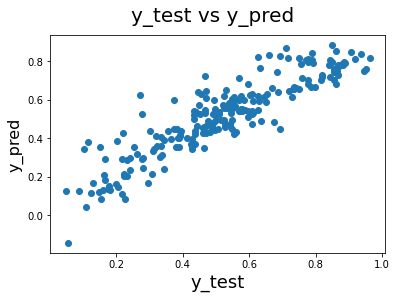

In [100]:
# Plot the y_test and y_pred on a graphic
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

## Equation for best fitted line for the model:-

$y = 0.2106+0.4761 x temp +0.2328 x yr_2019+.074 x Summer+.1437x Winter-0063 x Jan-0.047x mnth_Feb+ .0518x mnth_Aug-0.043x mnth_Dec -0.048x Nov - 0.045 x Mon - .306 x Light_Rain - .079 x cloudy$
**That is our model best fited line linear Equation.**

## Assumption:-
On the basis of our `Equation of best fit line`, we can say `temp` plays the very important role in the growth of demand of `bikes` being followed by season, and `Rain` and  `cloudy` day hemper the demand of bikes.